# Project-1 | Btech CSE 2023-2027
---
**Team Members :-**

**Suhas Kanwar** - Btech-CSE-3

**Aditya Yadav** - Btech-CSE-3

**Suryansh Mahajan** - Btech-CSE-3

---

**Dataset Glossary**

Patient ID - Unique identifier for each patient

Age - Age of the patient

Sex - Gender of the patient (Male/Female)

Cholesterol - Cholesterol levels of the patient

Blood Pressure - Blood pressure of the patient (systolic/diastolic)

Heart Rate - Heart rate of the patient

Diabetes - Whether the patient has diabetes (Yes/No)

Family History - Family history of heart-related problems (1: Yes, 0: No)

Smoking - Smoking status of the patient (1: Smoker, 0: Non-smoker)

Obesity - Obesity status of the patient (1: Obese, 0: Not obese)

Alcohol Consumption - Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)

Exercise Hours Per Week - Number of exercise hours per week

Diet - Dietary habits of the patient (Healthy/Average/Unhealthy)

Previous Heart Problems - Previous heart problems of the patient (1: Yes, 0: No)

Medication Use - Medication usage by the patient (1: Yes, 0: No)

Stress Level - Stress level reported by the patient (1-10)

Sedentary Hours Per Day - Hours of sedentary activity per day

Income - Income level of the patient

BMI - Body Mass Index (BMI) of the patient

Triglycerides - Triglyceride levels of the patient

Physical Activity Days Per Week - Days of physical activity per week

Sleep Hours Per Day - Hours of sleep per day

Country - Country of the patient

Continent - Continent where the patient resides

Hemisphere - Hemisphere where the patient resides

Heart Attack Risk - Presence of heart attack risk (1: Yes, 0: No)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Importing Dataset

In [37]:
df = pd.read_csv("assets/data/heart_attack_prediction_dataset.csv")

## About Dataset

In [ ]:
df.head(5)

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  \
0  31.251233            286                                0   
1  27.194973            235                                1   
2  28.176571            587                                4   
3  36.464704            378                                3   
4  21.809144            231                                1   

   Sleep Hours Per Day    Country      Continent           Hemisphere  \
0                    6  Argentina  South America  Southern Hemisphere   
1                    7     Canada  North America  Northern Hemisphere   
2                    4     France         Europe  Northern Hemisphere   
3                    4     Canada  North America  Northern Hemisphere   
4                    5   Thailand           Asia  Northern Hemisphere   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 26 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
print("The dimensions of the Data Frame (shape):",df.shape)
print("Total no. of elements in the Data Frame (size):",df.size)

The dimensions of the Data Frame (shape): (8763, 26)
Total no. of elements in the Data Frame (size): 227838


In [7]:
print("Columns:")
for i in df.columns:
    print(i)

Columns:
Patient ID
Age
Sex
Cholesterol
Blood Pressure
Heart Rate
Diabetes
Family History
Smoking
Obesity
Alcohol Consumption
Exercise Hours Per Week
Diet
Previous Heart Problems
Medication Use
Stress Level
Sedentary Hours Per Day
Income
BMI
Triglycerides
Physical Activity Days Per Week
Sleep Hours Per Day
Country
Continent
Hemisphere
Heart Attack Risk


### Checking duplicate values

In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 26)


We can see that there are no duplicate values in the dataset

### Checking null values

In [9]:
print(df.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


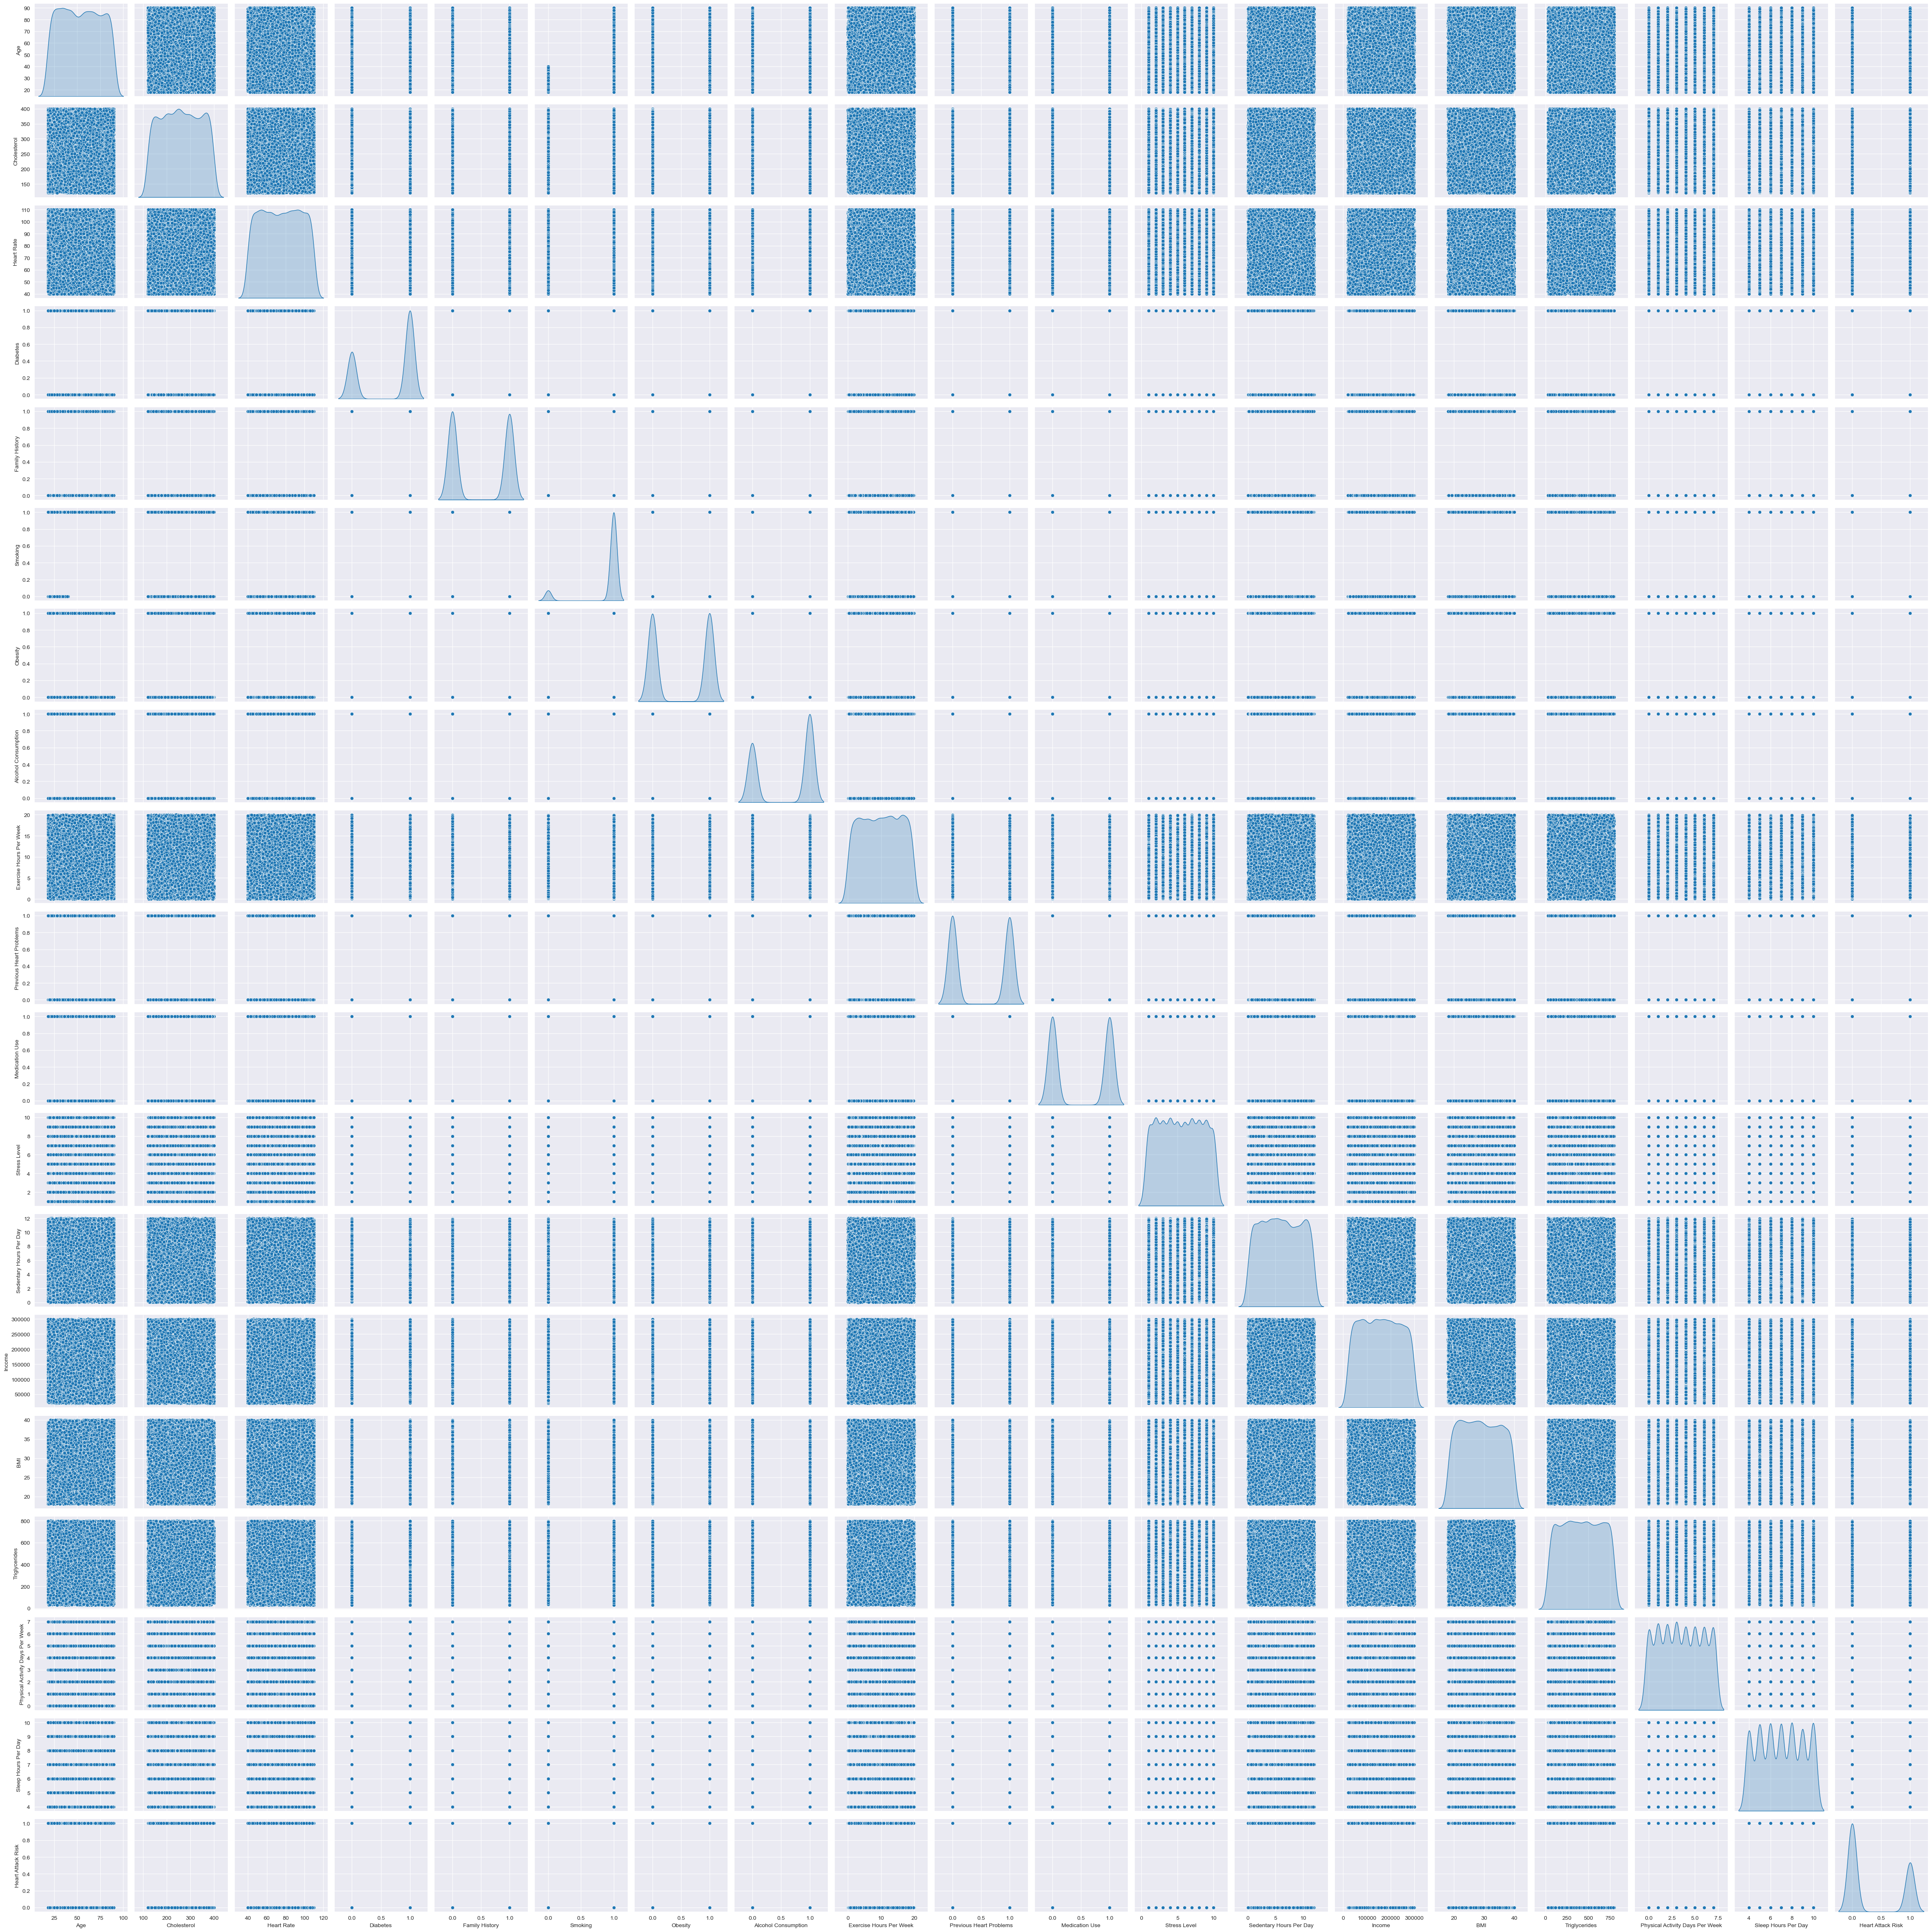

In [12]:
sns.pairplot(df,diag_kind='kde')
plt.tight_layout()
plt.show()

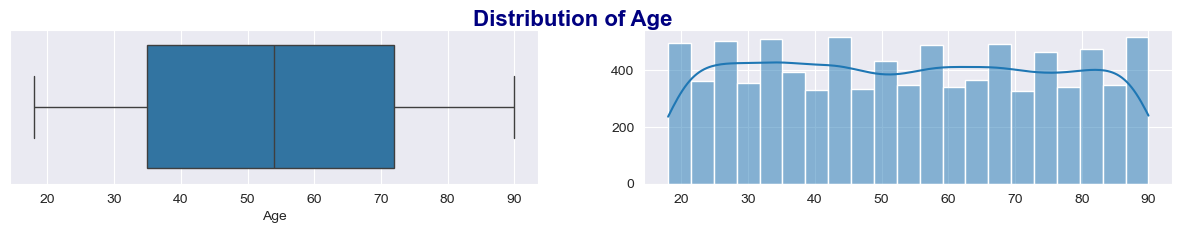

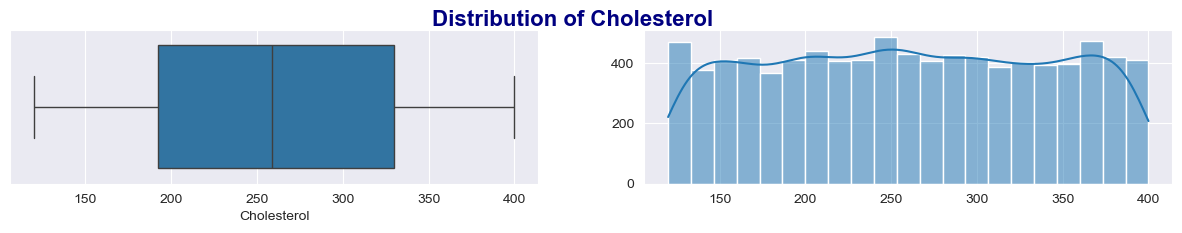

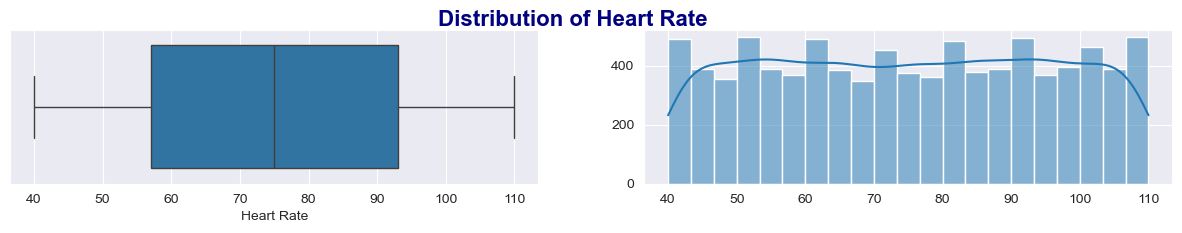

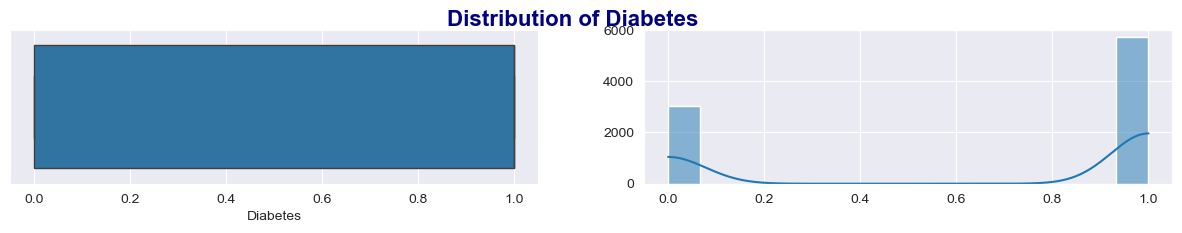

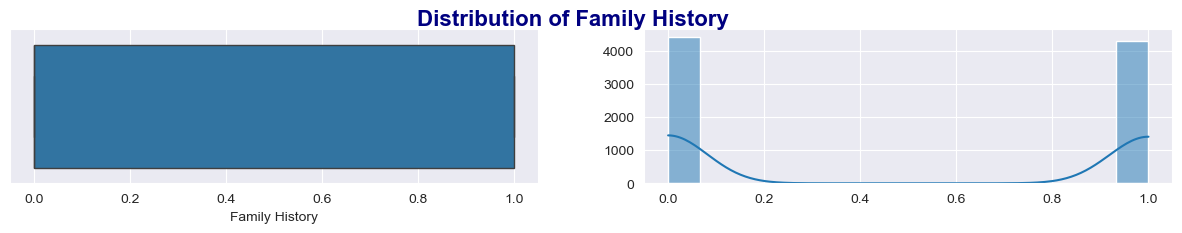

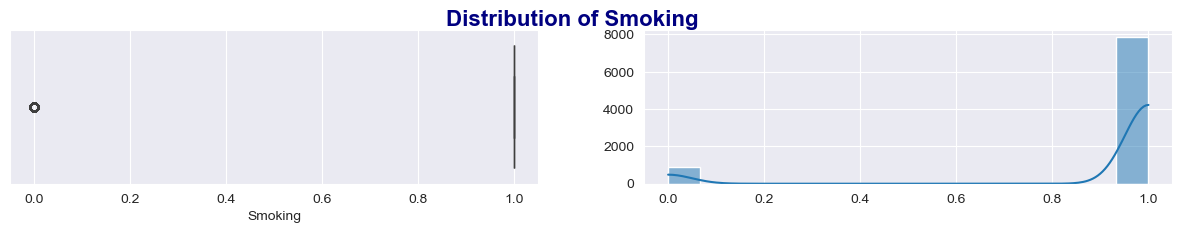

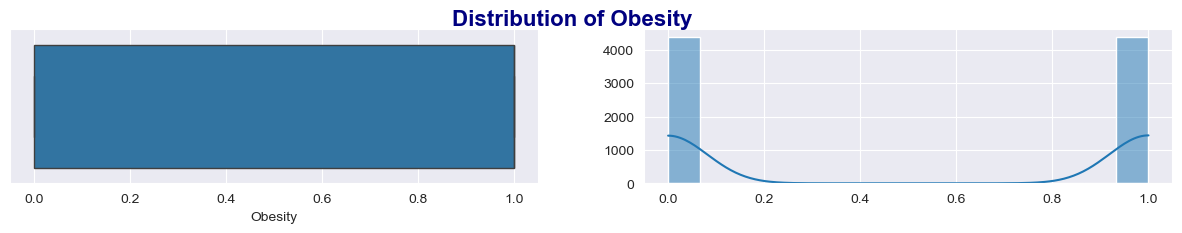

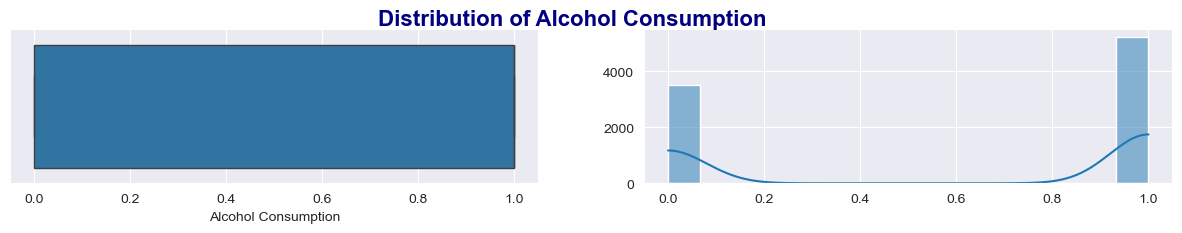

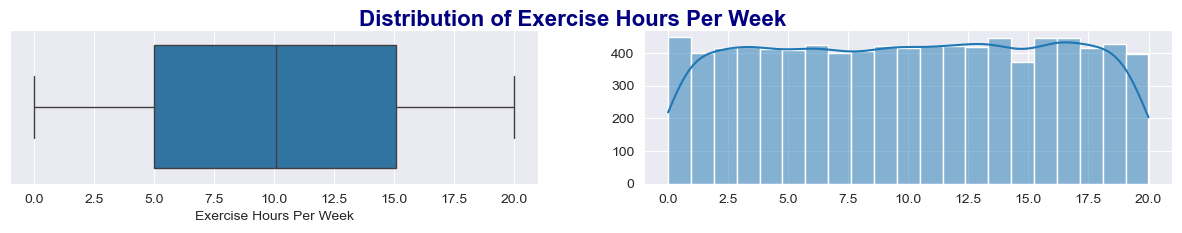

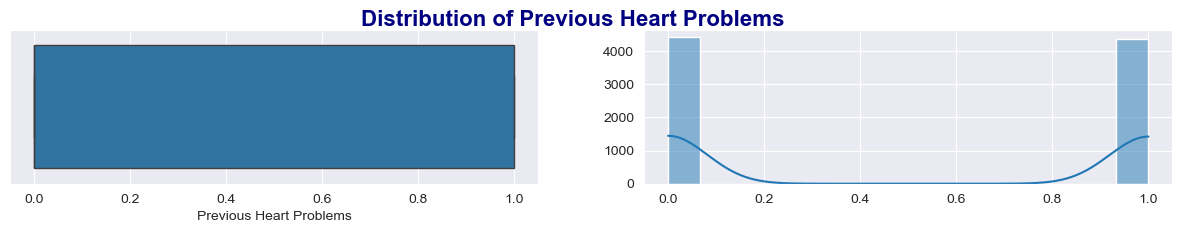

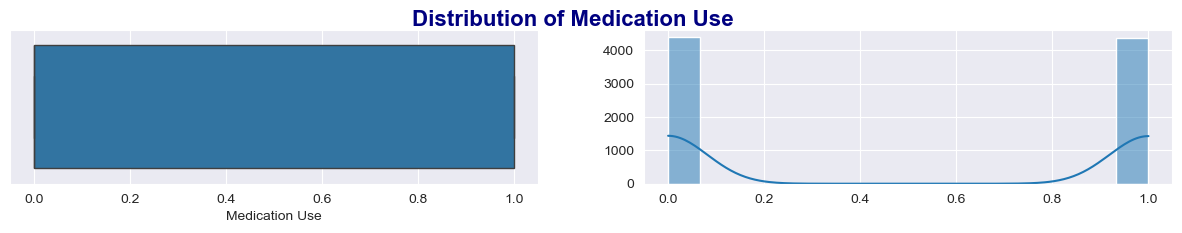

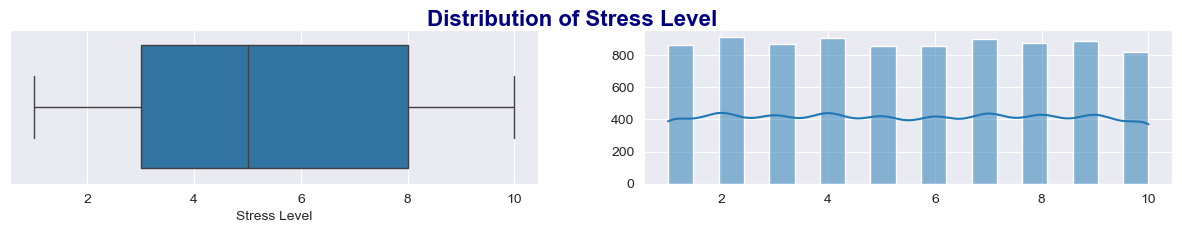

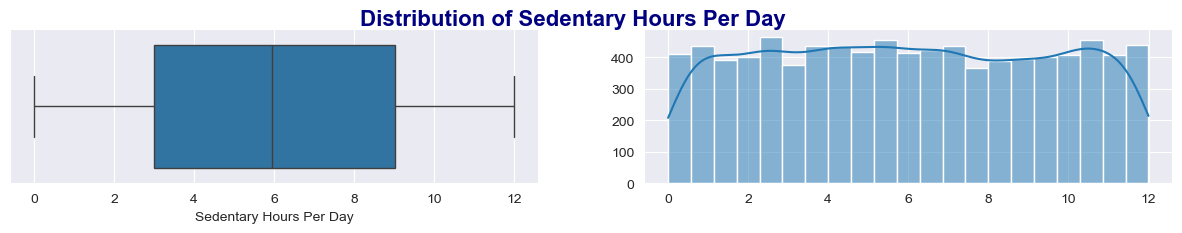

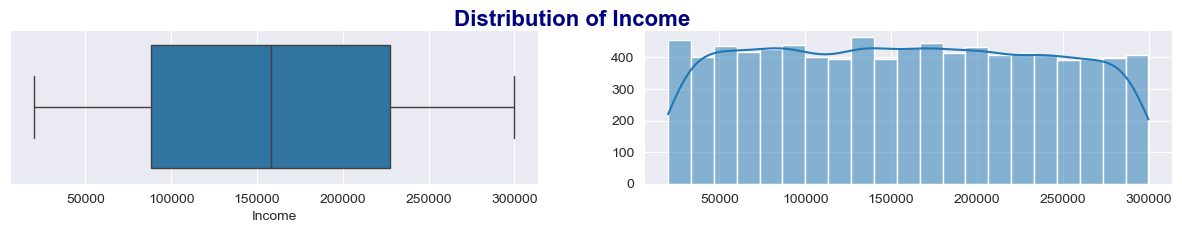

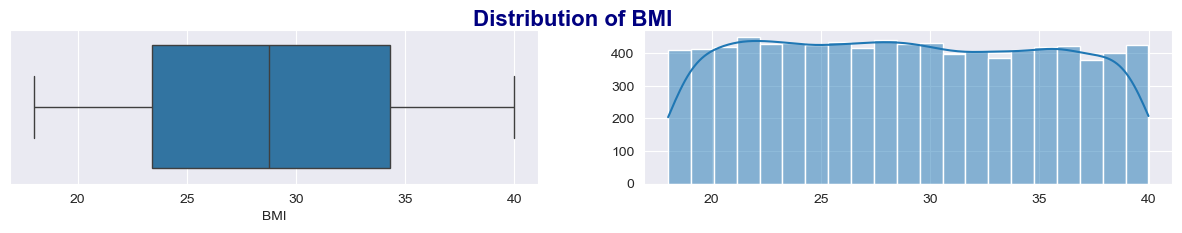

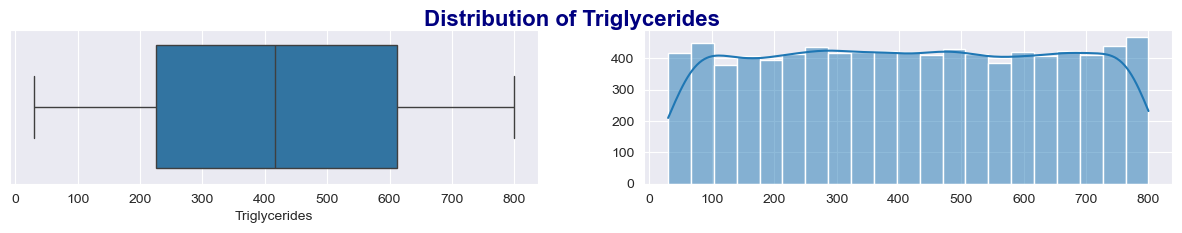

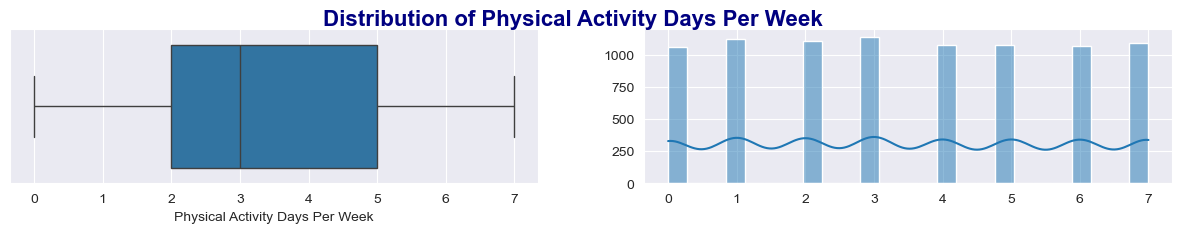

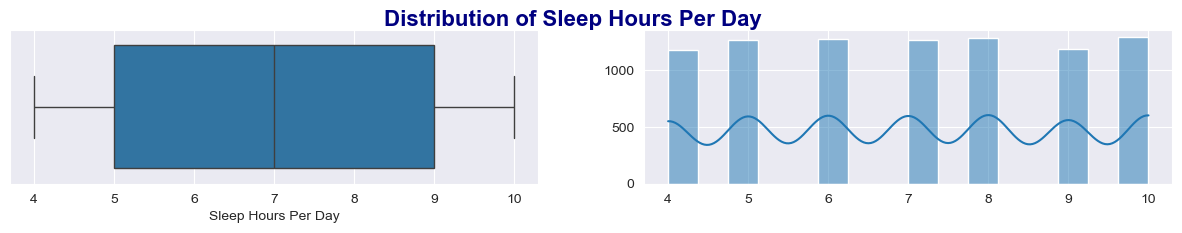

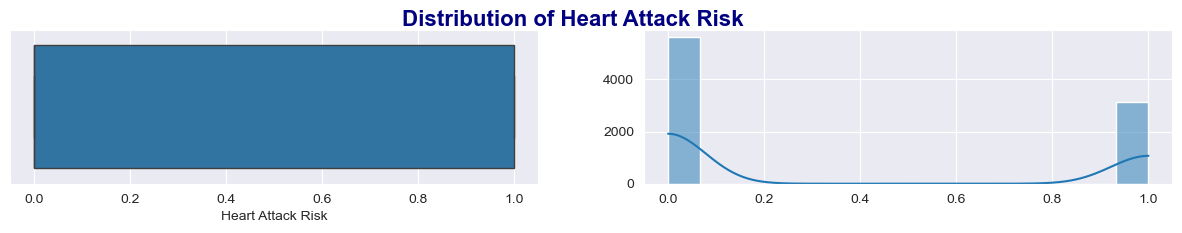

In [13]:
df_num = df.select_dtypes(exclude = 'object')
columns = df_num.columns
sns.set_style("darkgrid")
for i in range(0, 19):
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    plt.suptitle(f"Distribution of {columns[i]}", fontsize=16, fontweight='bold', color='navy')
    sns.boxplot(x=columns[i], data=df_num, ax=ax[0])
    sns.histplot(df_num[columns[i]],kde = True, ax=ax[1])
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

## Data Preprocessing

In [14]:
df.drop(columns='Patient ID', inplace=True)

In [15]:
numerical_attributes = df.select_dtypes(include=[np.number]).columns
categorical_attributes = df.select_dtypes(include=['object']).columns
df[numerical_attributes].nunique()

Age                                  73
Cholesterol                         281
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Heart Attack Risk                     2
dtype: int64

In [16]:
numerical_binaries = []

numerical_nonbinaries = []

for i in numerical_attributes:
    if df[i].nunique() == 2:
        numerical_binaries.append(i)
    else:
        numerical_nonbinaries.append(i)

print("Binary Attributes ->", numerical_binaries)
print("Non-binary numerical Attributes ->", numerical_nonbinaries)

Binary Attributes -> ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use', 'Heart Attack Risk']
Non-binary numerical Attributes -> ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']


In [17]:
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)

df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])

df = df.drop('Blood Pressure', axis=1)

## Visualization of data

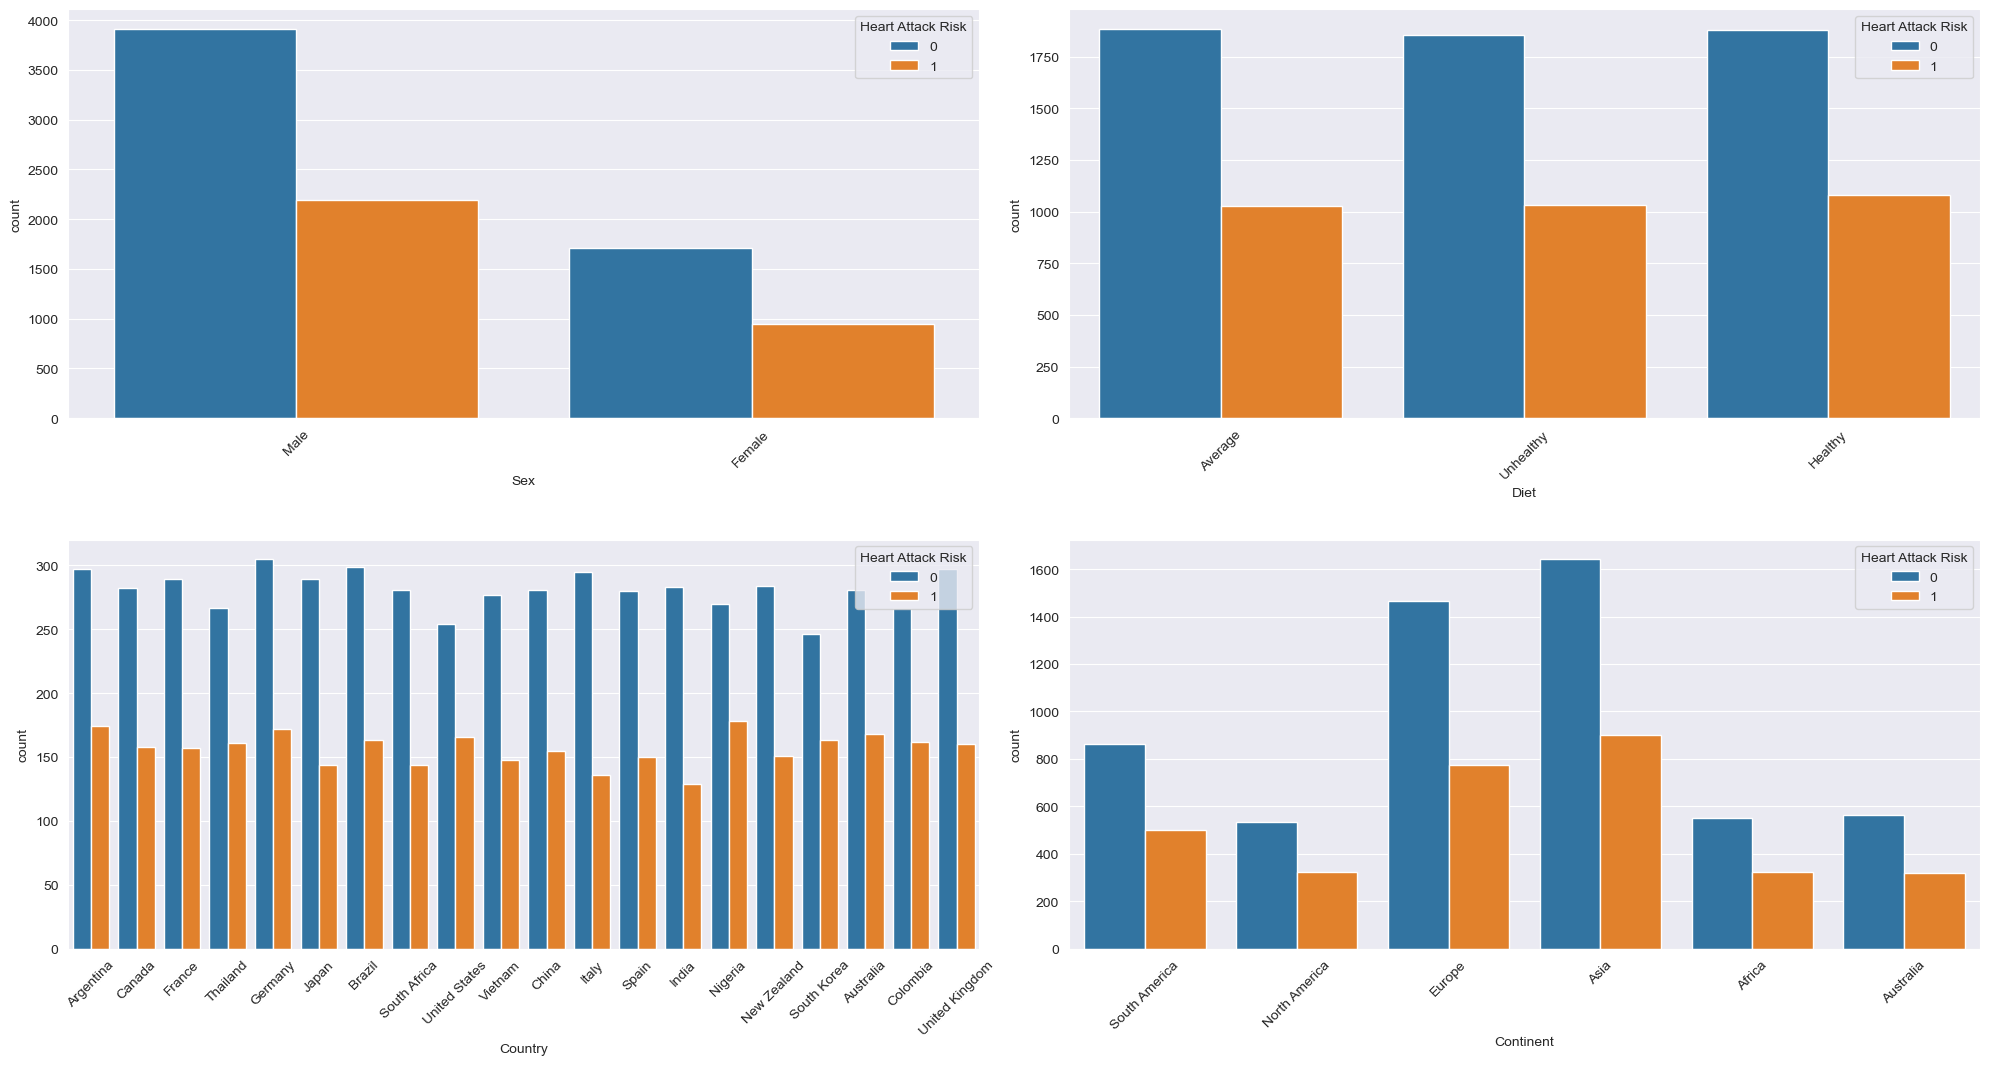

In [18]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(['Sex','Diet','Country','Continent'], 1):
    plt.subplot(3,2, i)  
    sns.countplot(data=df, x=col, hue='Heart Attack Risk')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

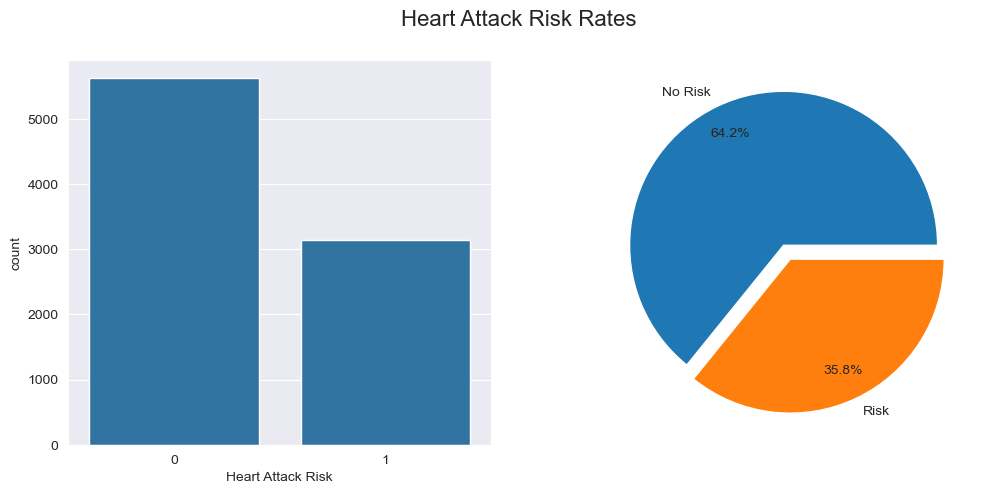

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.barplot(x=df["Heart Attack Risk"].value_counts().index, y=df["Heart Attack Risk"].value_counts())
plt.subplot(1, 2, 2)
plt.pie(x=df["Heart Attack Risk"].value_counts(), autopct="%.1f%%", pctdistance=0.8, labels= ["No Risk", "Risk"], explode=[0.05,0.05])
plt.suptitle("Heart Attack Risk Rates", fontsize=16)
plt.show()

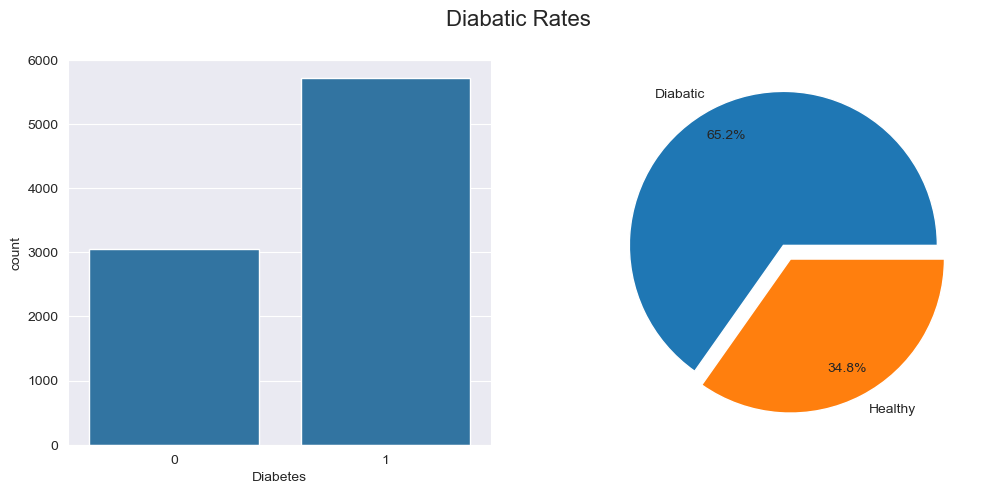

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.barplot(x=df["Diabetes"].value_counts().index, y=df["Diabetes"].value_counts())
plt.subplot(1, 2, 2)
plt.pie(x=df["Diabetes"].value_counts(), autopct="%.1f%%", pctdistance=0.8, labels= ["Diabatic", "Healthy"], explode=[0.05,0.05])
plt.suptitle("Diabatic Rates", fontsize=16)
plt.show()

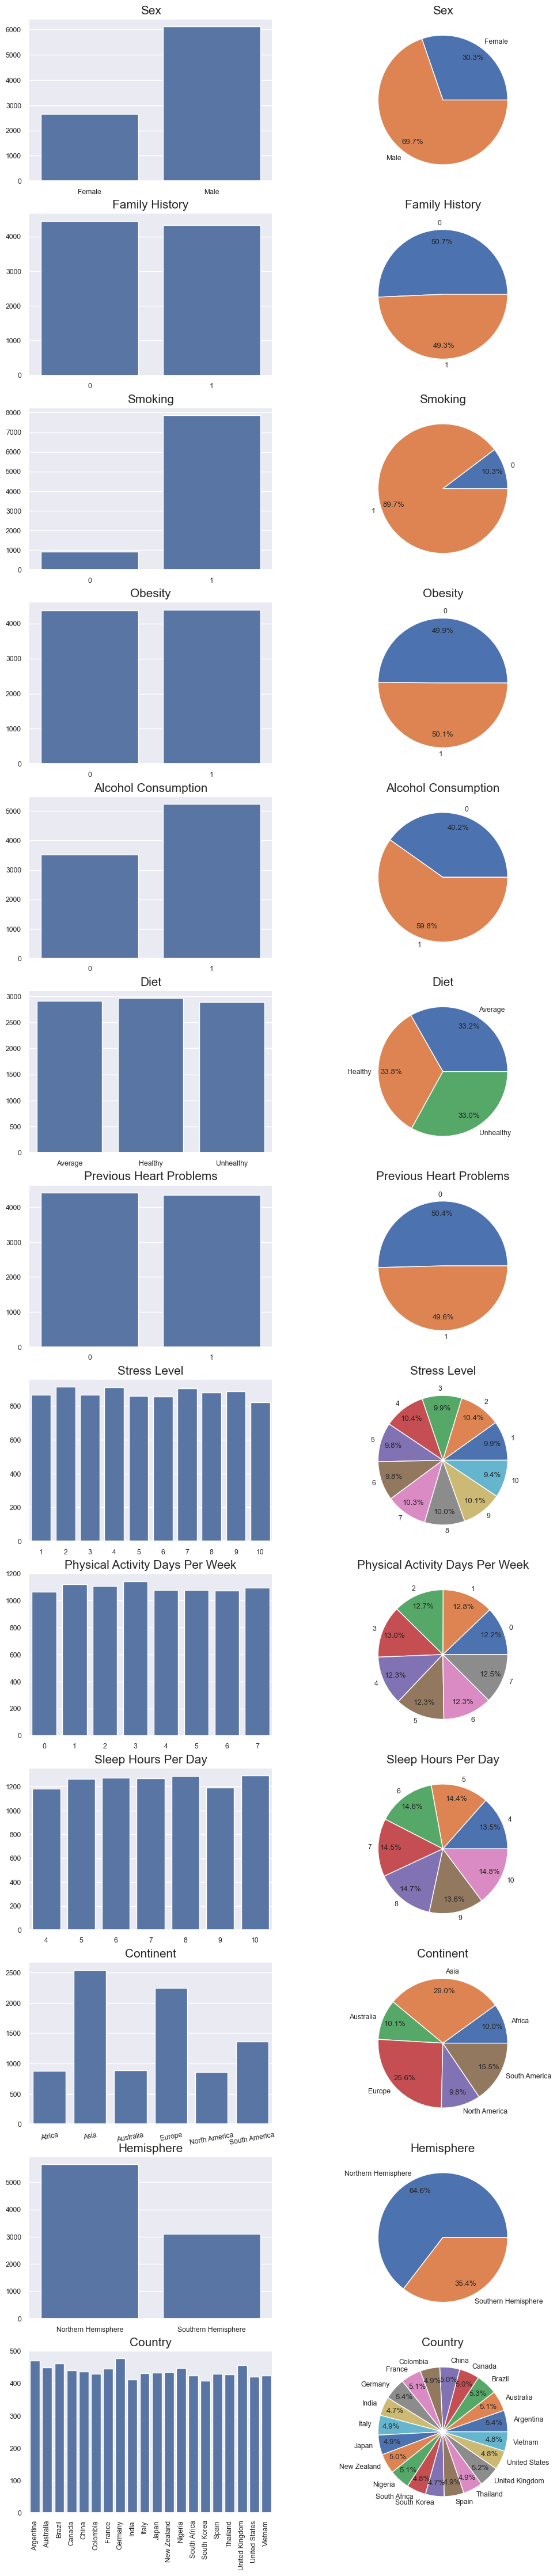

In [21]:
feature_list = ['Sex', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet',
                'Previous Heart Problems', 'Stress Level', 'Physical Activity Days Per Week',
                'Sleep Hours Per Day', 'Continent', 'Hemisphere', 'Country']
plt.figure(figsize=(12,65))
sns.set_theme(font_scale=0.8)

i = 0
j = 0
for col in feature_list:
    feature = df.groupby(col)[col].count()
    plt.subplot(15, 2, i+1)
    sns.barplot(x=feature.index, y=feature.values)
    plt.title(col, fontsize=15)
    plt.xlabel("")
    if col == "Country":
        plt.xticks(rotation=90)
    if col == "Continent":
        plt.xticks(rotation=10)
        
    plt.subplot(15, 2, j+2)
    plt.pie(x=feature.values, autopct="%.1f%%", pctdistance=0.8, labels=feature.index)
    plt.title(col, fontsize=15)
    i += 2
    j += 2
plt.show()

## Prediction Model

### Train Test Split

In [24]:
X = df.drop(columns=['Heart Attack Risk'])
y = df['Heart Attack Risk']

categorical_attributes = X.select_dtypes(include=['object']).columns
for column in categorical_attributes:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

#### Standardizing  Data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

The shape of X_train is       (7010, 25)
The shape of X_test is        (1753, 25)
The shape of y_train is       (7010,)
The shape of y_test is        (1753,)


### Logistic Regression

In [27]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [28]:
y_pred = model.predict(X_test)

In [29]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Accuracy: 0.6417569880205363


c:\Users\Suhas Kanwar\Desktop\Project-1 (BMU)\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Suhas Kanwar\Desktop\Project-1 (BMU)\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Suhas Kanwar\Desktop\Project-1 (BMU)\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1125    0]
 [ 628    0]]


### KNN (K-Nearest Neighbours)

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
y_pred = knn.predict(X_test)

In [34]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.77      0.71      1125
           1       0.39      0.26      0.31       628

    accuracy                           0.59      1753
   macro avg       0.52      0.51      0.51      1753
weighted avg       0.56      0.59      0.56      1753

Accuracy: 0.5869937250427838


In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[868 257]
 [467 161]]
